In [1]:
import pandas as pd
import numpy as np

In [22]:
import matplotlib.pyplot as plt

In [ ]:
import nltk

In [28]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [12]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zachariamwaura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zachariamwaura/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('CLEANDATA/Clean_MT.csv', index_col=False)
df.head(10)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
5,Morbid obesity. Laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","bariatrics, gastric bypass, eea anastomosis, r..."
6,"Liposuction of the supraumbilical abdomen, re...",Bariatrics,Liposuction,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","bariatrics, breast reconstruction, excess, lma..."
7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
8,Suction-assisted lipectomy - lipodystrophy of...,Bariatrics,Lipectomy - Abdomen/Thighs,"PREOPERATIVE DIAGNOSIS: , Lipodystrophy of the...","bariatrics, lipodystrophy, abd pads, suction-a..."
9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."


In [4]:
df['transcription'].iloc[2]

'HISTORY OF PRESENT ILLNESS: , I have seen ABC today.  He is a very pleasant gentleman who is 42 years old, 344 pounds.  He is 5\'9".  He has a BMI of 51.  He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.  He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.  He wants to be able to exercise and play volleyball.  Physically, he is sluggish.  He gets tired quickly.  He does not go out often.  When he loses weight he always regains it and he gains back more than he lost.  His biggest weight loss is 25 pounds and it was three months before he gained it back.  He did six months of not drinking alcohol and not taking in many calories.  He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin\'s Diet for one month two years ago.,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty with airline seats, tying sho

'HISTORY OF PRESENT ILLNESS: , I have seen ABC today.  He is a very pleasant gentleman who is 42 years old, 344 pounds.  He is 5\'9".  He has a BMI of 51.  He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.  He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.  He wants to be able to exercise and play volleyball.  Physically, he is sluggish.  He gets tired quickly.  He does not go out often.  When he loses weight he always regains it and he gains back more than he lost.  His biggest weight loss is 25 pounds and it was three months before he gained it back.  He did six months of not drinking alcohol and not taking in many calories.  He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin\'s Diet for one month two years ago.,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, difficulty walking, high cholesterol, and high blood pressure.  He has asthma and difficulty walking two blocks or going eight to ten steps.  He has sleep apnea and snoring.  He is a diabetic, on medication.  He has joint pain, knee pain, back pain, foot and ankle pain, leg and foot swelling.  He has hemorrhoids.,PAST SURGICAL HISTORY: , Includes orthopedic or knee surgery.,SOCIAL HISTORY: , He is currently single.  He drinks alcohol ten to twelve drinks a week, but does not drink five days a week and then will binge drink.  He smokes one and a half pack a day for 15 years, but he has recently stopped smoking for the past two weeks.,FAMILY HISTORY: , Obesity, heart disease, and diabetes.  Family history is negative for hypertension and stroke.,CURRENT MEDICATIONS:,  Include Diovan, Crestor, and Tricor.,MISCELLANEOUS/EATING HISTORY:  ,He says a couple of friends of his have had heart attacks and have had died.  He used to drink everyday, but stopped two years ago.  He now only drinks on weekends.  He is on his second week of Chantix, which is a medication to come off smoking completely.  Eating, he eats bad food.  He is single.  He eats things like bacon, eggs, and cheese, cheeseburgers, fast food, eats four times a day, seven in the morning, at noon, 9 p.m., and 2 a.m.  He currently weighs 344 pounds and 5\'9".  His ideal body weight is 160 pounds.  He is 184 pounds overweight.  If he lost 70% of his excess body weight that would be 129 pounds and that would get him down to 215.,REVIEW OF SYSTEMS: , Negative for head, neck, heart, lungs, GI, GU, orthopedic, or skin.  He also is positive for gout.  He denies chest pain, heart attack, coronary artery disease, congestive heart failure, arrhythmia, atrial fibrillation, pacemaker, pulmonary embolism, or CVA.  He denies venous insufficiency or thrombophlebitis.  Denies shortness of breath, COPD, or emphysema.  Denies thyroid problems, hip pain, osteoarthritis, rheumatoid arthritis, GERD, hiatal hernia, peptic ulcer disease, gallstones, infected gallbladder, pancreatitis, fatty liver, hepatitis, rectal bleeding, polyps, incontinence of stool, urinary stress incontinence, or cancer.  He denies cellulitis, pseudotumor cerebri, meningitis, or encephalitis.,PHYSICAL EXAMINATION:  ,He is alert and oriented x 3.  Cranial nerves II-XII are intact.  Neck is soft and supple.  Lungs:  He has positive wheezing bilaterally.  Heart is regular rhythm and rate.  His abdomen is soft.  Extremities:  He has 1+ pitting edema.,IMPRESSION/PLAN:,  I have explained to him the risks and potential complications of laparoscopic gastric bypass in detail and these include bleeding, infection, deep venous thrombosis, pulmonary embolism, leakage from the gastrojejuno-anastomosis, jejunojejuno-anastomosis, and possible bowel obstruction among other potential complications.  He understands.  He wants to proceed with workup and evaluation for laparoscopic Roux-en-Y gastric bypass.  He will need to get a letter of approval from Dr. XYZ.  He will need to see a nutritionist and mental health worker.  He will need an upper endoscopy by either Dr. XYZ.  He will need to go to Dr. XYZ as he previously had a sleep study.  We will need another sleep study.  He will need H. pylori testing, thyroid function tests, LFTs, glycosylated hemoglobin, and fasting blood sugar.  After this is performed, we will submit him for insurance approval.'

In [6]:
Sampletext = df['transcription'].iloc[2]

In [15]:
# Preprocessing

def PreProcess(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Lowercasing
    tokens = [w.lower() for w in tokens]
    # Remove punctuation
    words = [word for word in tokens if word.isalpha()]
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    #lammatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return words

In [16]:
PreProcess(Sampletext)

['history',
 'present',
 'illness',
 'seen',
 'abc',
 'today',
 'pleasant',
 'gentleman',
 'year',
 'old',
 'pound',
 'bmi',
 'overweight',
 'ten',
 'year',
 'since',
 'age',
 'highest',
 'pound',
 'lowest',
 'pursuing',
 'surgical',
 'attempt',
 'weight',
 'loss',
 'feel',
 'good',
 'get',
 'healthy',
 'begin',
 'exercise',
 'want',
 'able',
 'exercise',
 'play',
 'volleyball',
 'physically',
 'sluggish',
 'get',
 'tired',
 'quickly',
 'go',
 'often',
 'loses',
 'weight',
 'always',
 'regains',
 'gain',
 'back',
 'lost',
 'biggest',
 'weight',
 'loss',
 'pound',
 'three',
 'month',
 'gained',
 'back',
 'six',
 'month',
 'drinking',
 'alcohol',
 'taking',
 'many',
 'calorie',
 'multiple',
 'commercial',
 'weight',
 'loss',
 'program',
 'including',
 'slim',
 'fast',
 'one',
 'month',
 'one',
 'year',
 'ago',
 'atkin',
 'diet',
 'one',
 'month',
 'two',
 'year',
 'past',
 'medical',
 'history',
 'difficulty',
 'climbing',
 'stair',
 'difficulty',
 'airline',
 'seat',
 'tying',
 'shoe',


In [17]:
words = PreProcess(Sampletext)

In [18]:
# create word frequency
wordfreq = {}
for word in words:
    if word not in wordfreq:
        wordfreq[word] = 0 
    wordfreq[word] += 1

In [19]:
print(wordfreq)

{'history': 7, 'present': 1, 'illness': 1, 'seen': 1, 'abc': 1, 'today': 1, 'pleasant': 1, 'gentleman': 1, 'year': 6, 'old': 1, 'pound': 7, 'bmi': 1, 'overweight': 2, 'ten': 3, 'since': 1, 'age': 1, 'highest': 1, 'lowest': 1, 'pursuing': 1, 'surgical': 2, 'attempt': 1, 'weight': 6, 'loss': 3, 'feel': 1, 'good': 1, 'get': 4, 'healthy': 1, 'begin': 1, 'exercise': 2, 'want': 2, 'able': 1, 'play': 1, 'volleyball': 1, 'physically': 1, 'sluggish': 1, 'tired': 1, 'quickly': 1, 'go': 2, 'often': 1, 'loses': 1, 'always': 1, 'regains': 1, 'gain': 1, 'back': 3, 'lost': 2, 'biggest': 1, 'three': 1, 'month': 4, 'gained': 1, 'six': 1, 'drinking': 1, 'alcohol': 2, 'taking': 1, 'many': 1, 'calorie': 1, 'multiple': 1, 'commercial': 1, 'program': 1, 'including': 1, 'slim': 1, 'fast': 2, 'one': 4, 'ago': 2, 'atkin': 1, 'diet': 1, 'two': 4, 'past': 3, 'medical': 1, 'difficulty': 4, 'climbing': 1, 'stair': 1, 'airline': 1, 'seat': 1, 'tying': 1, 'shoe': 1, 'used': 2, 'public': 1, 'seating': 1, 'walking': 2

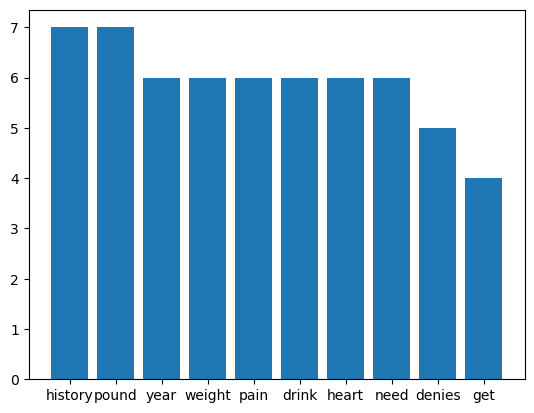

In [24]:
# plot word frequency top 10

wordfreq = sorted(wordfreq, key=lambda x: x[1], reverse=True)
wordfreq = wordfreq[:10]

plt.bar([x[0] for x in wordfreq], [x[1] for x in wordfreq])
plt.show()


In [ ]:
`# Fit and transform the preprocessed text
tfidf_matrix_preprocessed = vectorizer.fit_transform([' '.join(words)])

# Get the feature names (words)
feature_names_preprocessed = vectorizer.get_feature_names_out()

# Create a DataFrame with the TF-IDF scores for the preprocessed text
tfidf_df_preprocessed = pd.DataFrame(tfidf_matrix_preprocessed.toarray(), columns=feature_names_preprocessed)

# Display the TF-IDF DataFrame for the preprocessed text
tfidf_df_preprocessed.head()

,abc,abdomen,able,age,ago,airline,alcohol,alert,also,always,...,week,weekend,weighs,weight,wheezing,worker,workup,would,xyz,year
0,0.033168,0.033168,0.033168,0.033168,0.066336,0.033168,0.066336,0.033168,0.033168,0.033168,...,0.099504,0.033168,0.033168,0.199007,0.033168,0.033168,0.033168,0.066336,0.099504,0.199007


In [ ]:
# Define the vectorizer
vectorizer = TfidfVectorizer()

# Preprocess all texts in the DataFrame
df['processed_transcription'] = df['transcription'].apply(PreProcess)

# Fit and transform the preprocessed texts
tfidf_matrix_preprocessed = vectorizer.fit_transform(df['processed_transcription'].apply(lambda x: ' '.join(x)))

# Get the feature names (words)
feature_names_preprocessed = vectorizer.get_feature_names_out()

# Create a DataFrame with the TF-IDF scores for the preprocessed texts
tfidf_df_preprocessed = pd.DataFrame(tfidf_matrix_preprocessed.toarray(), columns=feature_names_preprocessed)

# Assuming 'medical_specialty' is the target variable
X = tfidf_df_preprocessed
y = df['medical_specialty']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3118, 15489)
Test set size: (780, 15489)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.25
